<a href="https://colab.research.google.com/github/janpeter19/CONF_2023_10_MODELICA15/blob/main/BPL_TEST2_Fedbatch_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Fedbatch script with PyFMI

The key library PyFMI is installed.

After the installation a small application BPL_TEST2_Fedbatch is loaded and run. You can continue with this example if you like.

In [ ]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
!chmod +x Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
!bash ./Miniconda3-py310_23.1.0-1-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.10/site-packages/')

--2023-03-29 11:34:03--  https://repo.anaconda.com/miniconda/Miniconda3-py39_23.1.0-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69888122 (67M) [application/x-sh]
Saving to: ‘Miniconda3-py39_23.1.0-1-Linux-x86_64.sh’

Miniconda3-py39_23. 100%[===================>]  66.65M   187MB/s    in 0.4s    

2023-03-29 11:34:04 (187 MB/s) - ‘Miniconda3-py39_23.1.0-1-Linux-x86_64.sh’ saved [69888122/69888122]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...





Preparing transaction: - \ | / - \ | done
Executing transaction: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
installation finished.


In [ ]:
!conda update -n base -c defaults conda --yes

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |   py39h06a4308_0         426 KB
    conda-23.3.0               |   py39h06a4308_0         962 KB
    cryptography-39.0.1        |   py39h9ce1e76_0         1.4 MB
    openssl-1.1.1t             |       h7f8727e_0         3.7 MB
    packaging-23.0             |   py39h06a4308_0          68 KB
    pyopenssl-23.0.0           |   py39h06a4308_0          96 KB
    requests-2.28.1            |   py39h06a4308_1          99 KB
    sqlite-3.41.1              |       h5eee18b_0         1.2 MB
    tqdm-4.65.0                |   py39hb070fc8_0         131 KB
    zstandard-0.19.0           |   py39h5eee18b_0

In [ ]:
!conda --version
!python --version

conda 23.3.0
Python 3.9.16


In [ ]:
!conda install -c conda-forge pyfmi --yes # Install the key package

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pyfmi


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |       2_kmp_llvm           6 KB  conda-forge
    assimulo-3.4               |   py39h5c5a87b_0         1.9 MB  conda-forge
    ca-c

# BPL_TEST2_Fedbatch setup

This notebook just produce the Figure 2 in the paper "Design ideas behind Bioprocess Library for Modelica", by J P Axelsson, to be presented at the 15th International Modelica Conference in Aachen, Germany, October 9-11, 2023.


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Fedbatch_linux_om_me.fmu
* Setup-file - BPL_TEST2_Fedbatch_explore.me.py

In [ ]:
%%bash
git clone https://github.com/janpeter19/BPL_TEST2_Fedbatch

Cloning into 'BPL_TEST2_Fedbatch'...


In [ ]:
%cd BPL_TEST2_Fedbatch

/content/BPL_TEST2_Fedbatch


In [ ]:
run -i BPL_TEST2_Fedbatch_explore.py

Linux - run FMU pre-comiled OpenModelica 1.21.0

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values / units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
describe('culture'); print(); #describe('liquidphase')                                  # Pump schedule parameter


Simplified text book model - only substrate S and cell concentration X



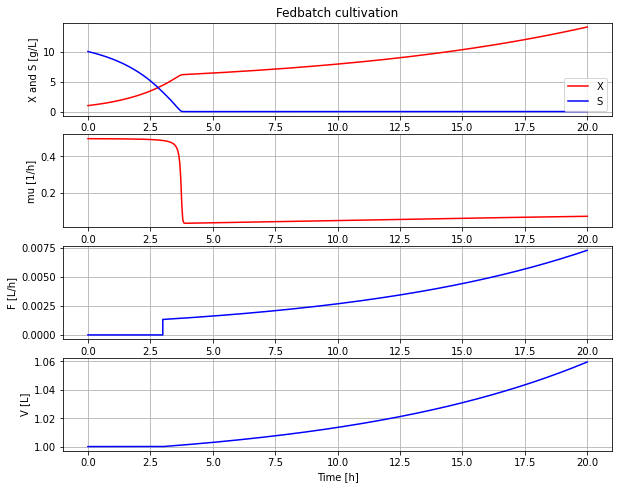

In [ ]:
# Simulation of the process
newplot(plotType='TimeSeries')
ax2.set_ylim([0, 0.45])
init(V_0=1000, VX_0=1*1e3, VS_0=10*1e3)
par(feedtank_S_in=600, Ks=0.1, Y=0.40)
par(t_start=4, F_start=4.0, mu_feed=0.2, F_max=35)
simu(20)

In [ ]:
disp('culture')

In [ ]:
describe('mu')

Cell specific growth rate variable : 0.12 [ 1/h ]


In [ ]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'dosagescheme', 'feedtank']


In [ ]:
describe('MSL')

MSL: 3.2.3 - used components: RealInput, RealOutput


In [ ]:
system_info()


System information
 -OS: Linux
 -Python: 3.9.16
 -Scipy: not installed in the notebook
 -PyFMI: 2.10.0
 -FMU by: OpenModelica Compiler OpenModelica 1.21.0~dev-185-g9d983b8
 -FMI: 2.0
 -Type: FMUModelME2
 -Name: BPL_TEST2.Fedbatch
 -Generated: 2023-01-19T09:29:14Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.1.1-beta
 -Interaction: FMU-explore version 0.9.7
